# Case 1: advanced analytics no mercado de vinhos
_________

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/3021e090-5a7e-4f0e-8298-4bfe5ce88206.webp" width=600>

Suponha que você é um cientista de dados que trabalha na área de *advanced analytics* de uma empresa especializada na distribuição e vendas de vinhos tintos. Naturalmente, a empresa está interessada em vender vinhos que sejam percebidos como bons por grande parte do público. Pensando nisso, foi feita uma pesquisa, na qual vinhos tintos com diferentes características físico-químicas foram oferecidos a alguns voluntários, que, após experimentá-los, deram notas de 0 a 10. A base coletada contém as seguintes informações:

- Medidas de 11 variáveis físico-químicas que caracterizam cada amostra (as features do problema):
<br><br>
    - 1 - fixed acidity - medida da acidez devido à presença de ácidos orgânicos de baixa volatilidade (ácido málico, lático, tartárico ou cítrico) no vinho;
    - 2 - volatile acidity - medida da acidez devido a ácidos de baixo peso molecular (sobretudo ácido acético) presentes no vinho, que são responsáveis pelo aroma e gosto de vinagre;
    - 3 - citric acid - medida de ácido cítrico no vinho;
    - 4 - residual sugar - medida de açúcar residual presente no vinho, com origem nos resíduos de açúcar da uva que permanecem no vinho após o fim da fermentação;
    - 5 - chlorides - medida de cloretos (íons de cloro) no vinho;
    - 6 - free sulfur dioxide - medida de dióxido de enxofre livre (isto é, que não está ligado a outras moléculas) no vinho;
    - 7 - total sulfur dioxide - medida de dióxido de enxofre total (livre + porção ligada a outras moléculas) no vinho;
    - 8 - density - medida da densidade do vinho;
    - 9 - pH - medida do pH do vinho;
    - 10 - sulphates - medida de sulfatos (íons SO₄²⁻) no vinho;
    - 11 - alcohol - medida da graduação alcoólica do vinho.
<br><br>
- Além disso, há a variável resposta que no caso é um score numérico:
<br><br>
    - 12 - quality - score numérico de qualidade (de 0 a 10), produzido com base em dados sensoriais.

Com base nestes dados coletados, o objetivo final será a construção de um modelo capaz de distinguir vinhos bons de ruins, com base nas medidas de suas características físico-químicas. 

Uma vez que tenhamos este modelo, caso produtoras de vinho ofereçam um novo vinho para ser vendido por sua empresa, será possível decidir de maneira mais direcionada se vale a pena passar a vender este produto ou não, de acordo com a predição de sua qualidade dada pelo modelo.

Dentro deste contexto, seu objetivo como cientista de dados é claro:

> Agregar valor ao negócio, explorando os dados que você tem à disposição.

Mas, antes que um modelo possa ser construído, há diversas etapas importantes para que conheçamos os dados que temos disponíveis. Então, a tarefa deste case é: **realizar detalhada análise exploratória dos dados coletados**, de modo a entregar uma **formulação do problema final** a ser atacado por técnicas de machine learning em etapas futuras. Em particular, a principal pergunta que queremos responder é:

> Como utilizar os dados que temos para que possamos, em um momento posterior, criar um sistema capaz de **decidir** se um dado vinho será vendido por nossa empresa ou não?


_________

*Obs.: O enunciado acima foi apenas uma historinha que criei pra motivar o problema em um contexto de negócio. Para maiores informações sobre a coleta e origem real dos dados, veja a página do dataset no repositório UCI machine learning repository, [disponível aqui!](https://archive.ics.uci.edu/ml/datasets/wine+quality)* 

_________

### Vamos começar!!

_______

1) Leia o arquivo csv `winequality-red.csv`, construindo um Data Frame do pandas. Responda:

- Quantas linhas há no dataset?
- Quantas colunas há no dataset?
- Quais os tipos de dados em cada coluna?
- Há dados nulos (null, missing) na base?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
df.shape

(1599, 12)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
# o "Non-Null Count" quantifica os registros NÃO-NULOS (preenchidos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# quantifica a quantidade de registros NULOS (vazios)
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Vale a pena dar uma olhada na base também:

In [8]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

_______

2) Utilizando a base de vinhos tintos, estude a distribuição das variáveis numéricas, calculando, para cada coluna, as principais estatísticas descritivas de posição (média, mediana, quartis, etc.) e de dispersão (std, IQR, etc.). Se desejar, visualize as distribuições de cada variável na amostra.

In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

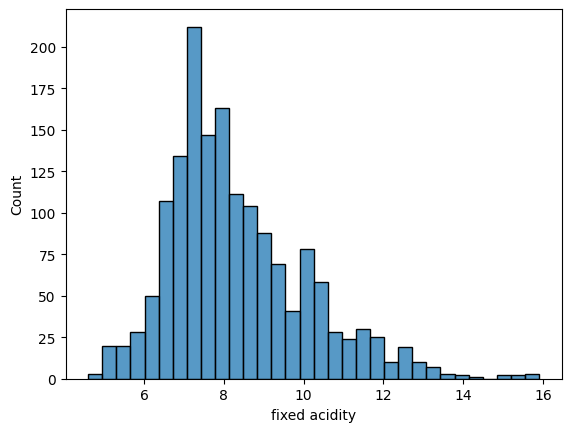

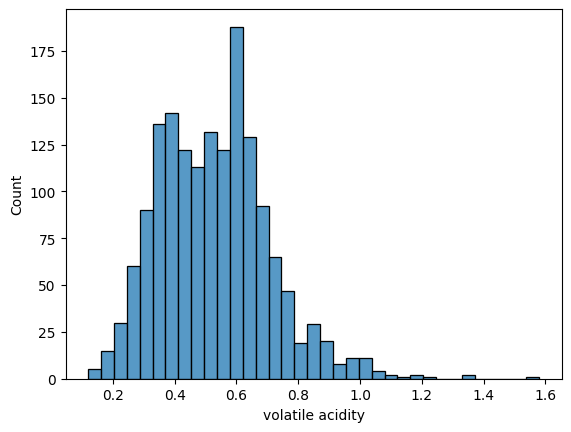

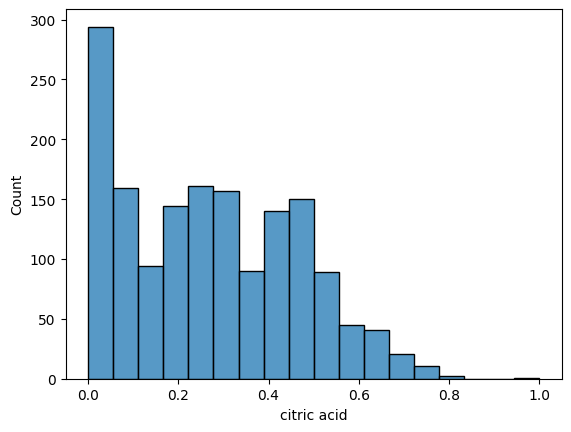

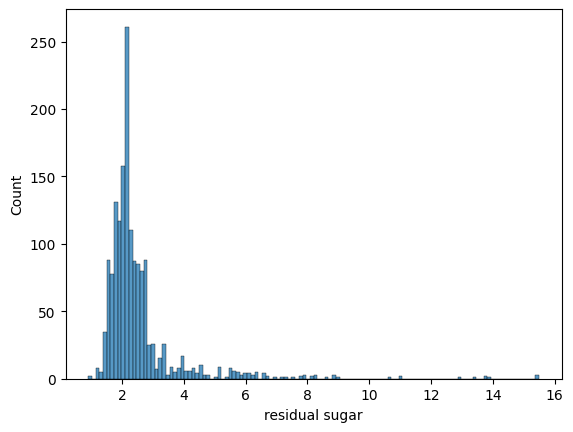

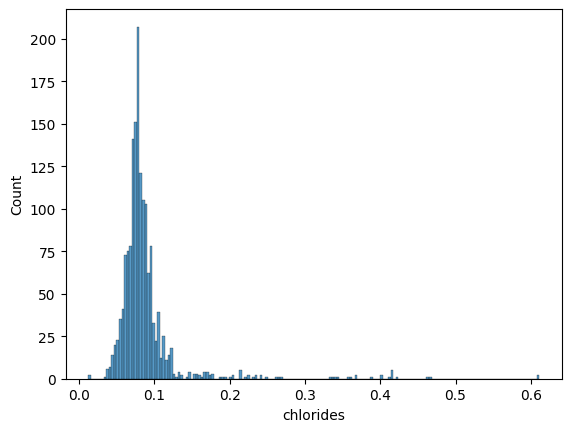

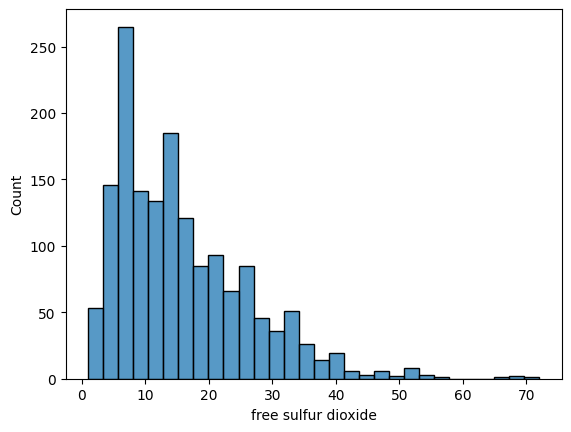

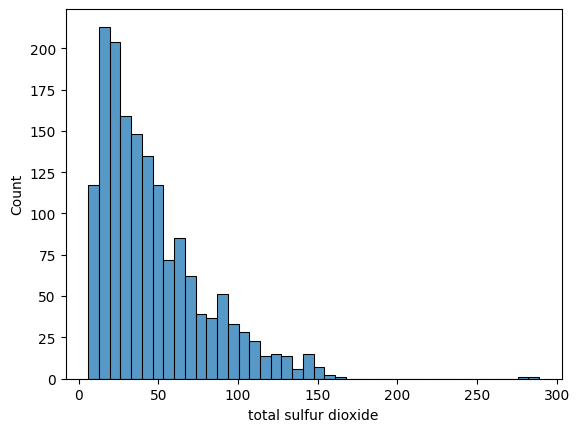

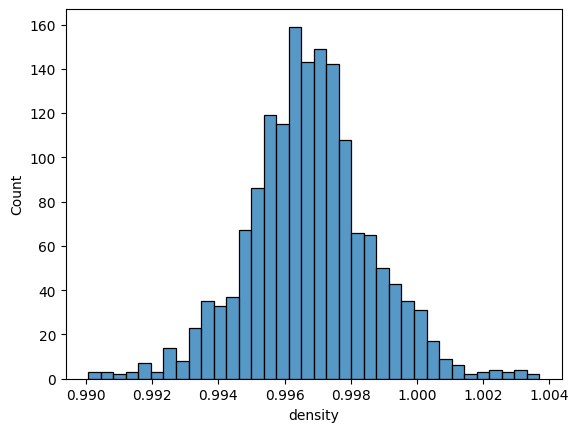

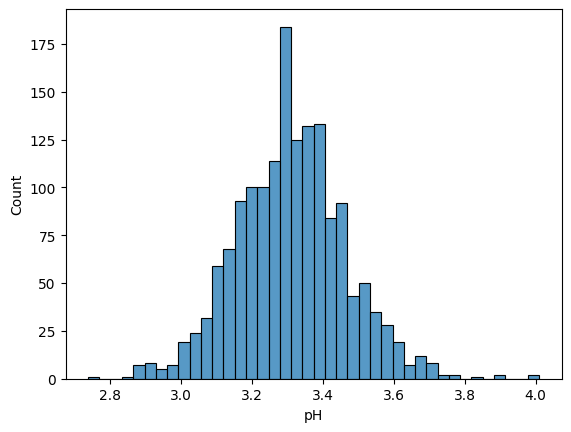

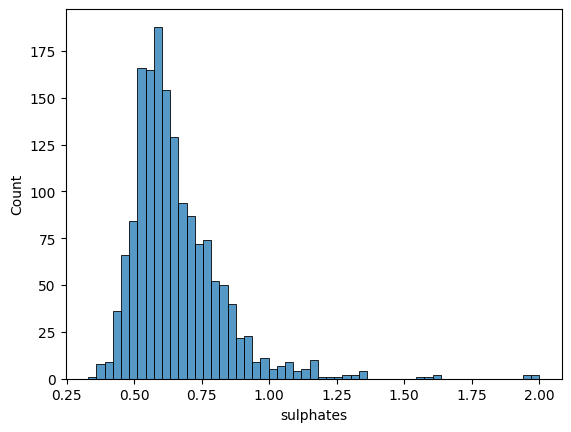

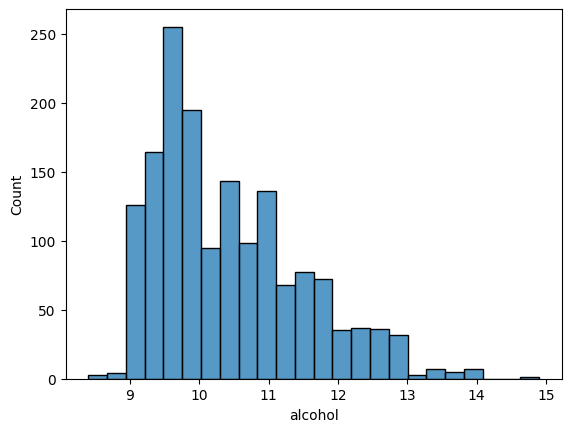

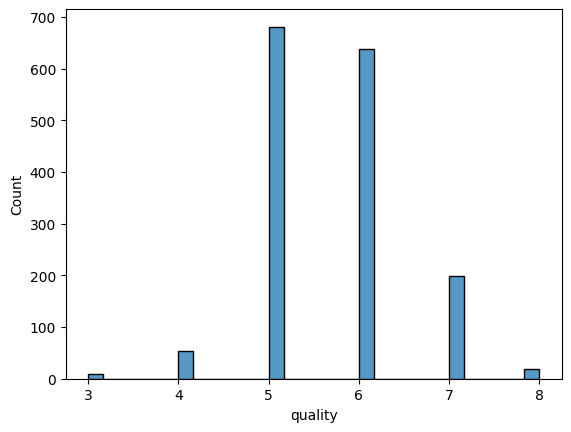

In [10]:
for col in df.columns:
    sns.histplot(data=df, x=col)
    plt.show()

In [11]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [12]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

_______

3) Utilizando a base de vinhos tintos, responda: existe alguma coluna com outliers? Indique qual método de detecção de outliers você utilizou, justificando seu uso.

In [13]:
df["pH"]

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64

In [14]:
for col in df.columns:

    m, s = df[col].mean(), df[col].std()

    obs_eh_outlier = df[col].apply(lambda x: (x-m)/s).apply(lambda x: abs(x) > 3)

    outliers = np.where(obs_eh_outlier)[0]

    print(f"Os outliers da coluna {col} são:\n\n{outliers}")
    print(f"\n{'='*80}\n")

Os outliers da coluna fixed acidity são:

[243 244 347 374 381 391 442 544 554 555 557 652]


Os outliers da coluna volatile acidity são:

[  38  120  126  127  199  672  690  724 1299 1312]


Os outliers da coluna citric acid são:

[151]


Os outliers da coluna residual sugar são:

[  33  163  164  274  324  325  396  400  480  494  595  649  652  911
  917  923 1043 1071 1074 1079 1081 1186 1235 1244 1434 1435 1474 1476
 1574 1589]


Os outliers da coluna chlorides são:

[  17   19   42   81   83  106  147  151  169  181  226  240  258  281
  291  451  568  692  730  754  776  777 1051 1165 1260 1319 1370 1372
 1374 1558 1570]


Os outliers da coluna free sulfur dioxide são:

[  14   15   57  396  400  584  925  926  982 1131 1154 1175 1231 1244
 1295 1296 1358 1434 1435 1474 1476 1558]


Os outliers da coluna total sulfur dioxide são:

[  15  109  354  515  591  636  649  651  672  684 1079 1081 1244 1493
 1496]


Os outliers da coluna density são:

[ 442  480  554  555  557  608  8

Se houver interesse e importância em identificar/remover outliers, podemos usar métodos mais robustos, como os discutidos [neste post](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/), ou segundo a própria [documentação do sklearn](https://scikit-learn.org/stable/modules/outlier_detection.html).

_______

4) Utilizando a base de vinhos tintos, estude os dados na coluna `quality`, que é a variável resposta do problema. Em particular, responda:

- Essa é uma variável contínua ou discreta?
- Como as notas estão distribuídas? Quais as notas mais/menos comuns?
- Faz sentido discretizar esta variável em dois níveis categóricos? 
    - Se sim, qual seria o valor de corte, e, com este corte, qual é o significado de cada nível categórico?
    - Como estes dois níveis categóricos estão distribuídos?

In [15]:
df["quality"].dtype

dtype('int64')

In [16]:
df["quality"].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [17]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [18]:
df["quality"].value_counts(normalize=True)

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: proportion, dtype: float64

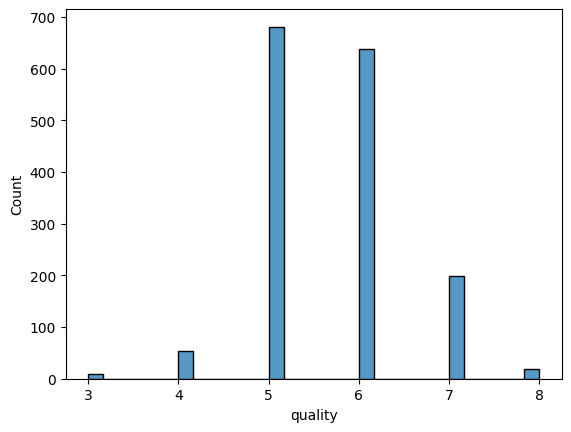

In [19]:
sns.histplot(data=df, x="quality");

In [20]:
df["quality"].nunique()

6

In [21]:
df["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [22]:
df["bom_ou_ruim"] = df["quality"].apply(lambda x: "bom" if x > 5 else "ruim") 

In [23]:
df["bom_ou_ruim"].nunique()

2

In [24]:
df["bom_ou_ruim"].value_counts()

bom_ou_ruim
bom     855
ruim    744
Name: count, dtype: int64

In [25]:
df["bom_ou_ruim"].value_counts(normalize=True)

bom_ou_ruim
bom     0.534709
ruim    0.465291
Name: proportion, dtype: float64

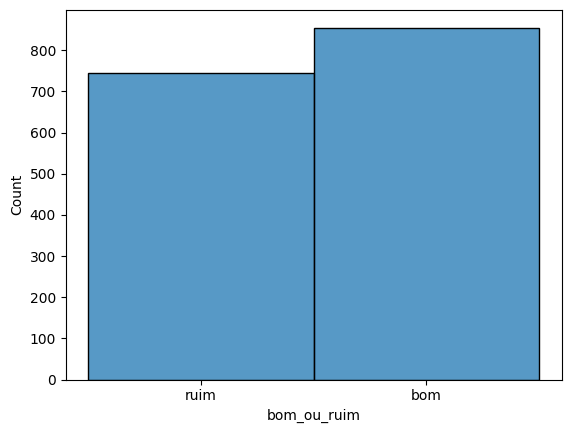

In [26]:
sns.histplot(data=df, x="bom_ou_ruim");

_______

5) Utilizando a base de vinhos tintos, calcule e/ou visualize a correlação (utilizando a relação que achar mais adequada) entre as variáveis na base. 

Em particular, estude a correlação entre as features e o target `quality`, e responda se há correlações fortes.

Plote também a relação entre cada uma das features e o target (na forma de um scatterplot, por exemplo).

Com base nas análises acima, responda: é uma boa ideia modelar o problema como um problema de regressão? Se sim, que métodos de aprendizagem você utilizaria?

In [27]:
corr = df.drop(columns="bom_ou_ruim").corr(method="spearman")

In [28]:
corr["quality"].sort_values()

volatile acidity       -0.380647
total sulfur dioxide   -0.196735
chlorides              -0.189922
density                -0.177074
free sulfur dioxide    -0.056901
pH                     -0.043672
residual sugar          0.032048
fixed acidity           0.114084
citric acid             0.213481
sulphates               0.377060
alcohol                 0.478532
quality                 1.000000
Name: quality, dtype: float64

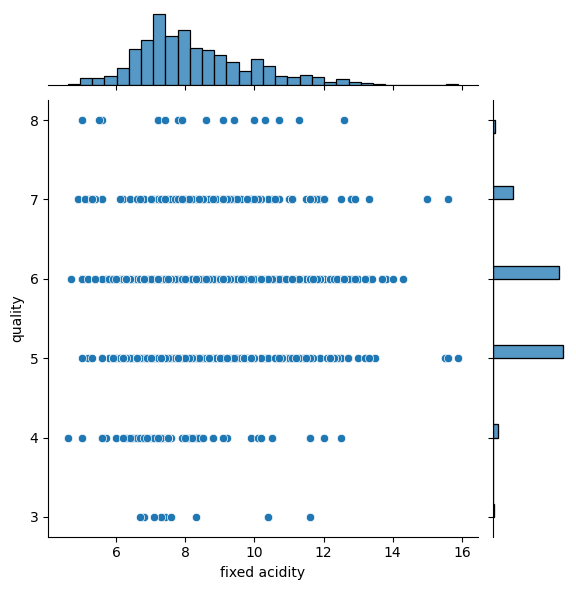

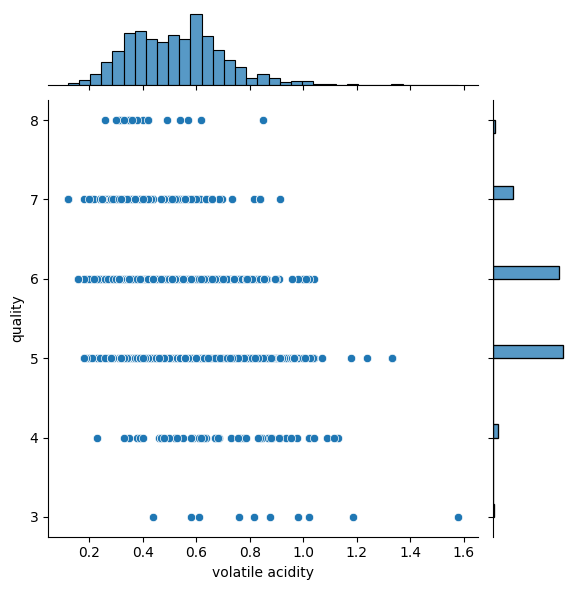

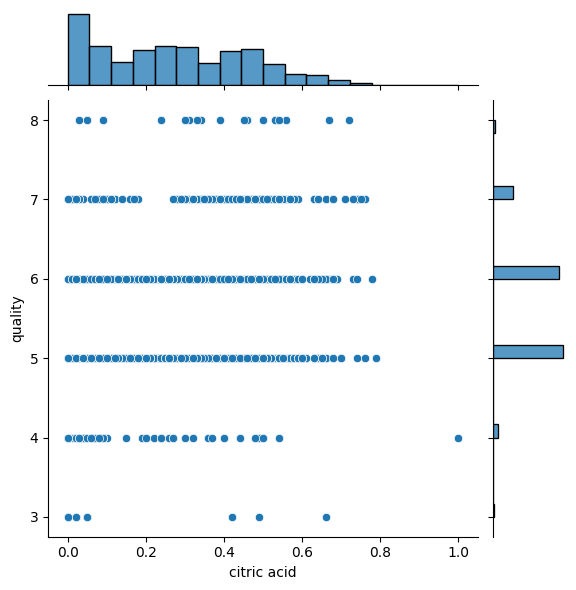

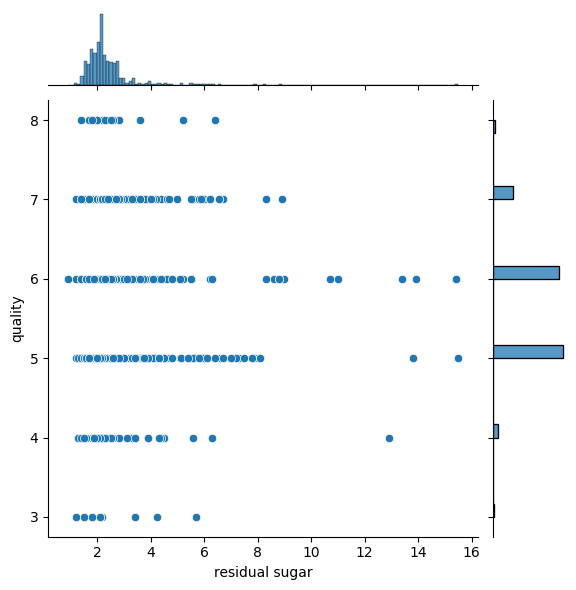

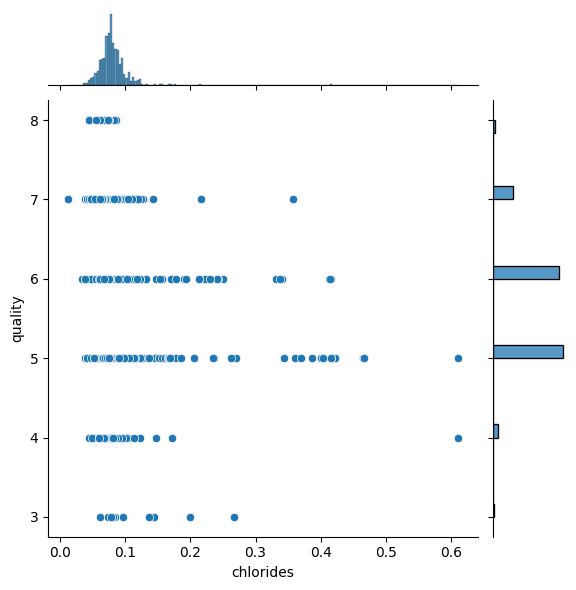

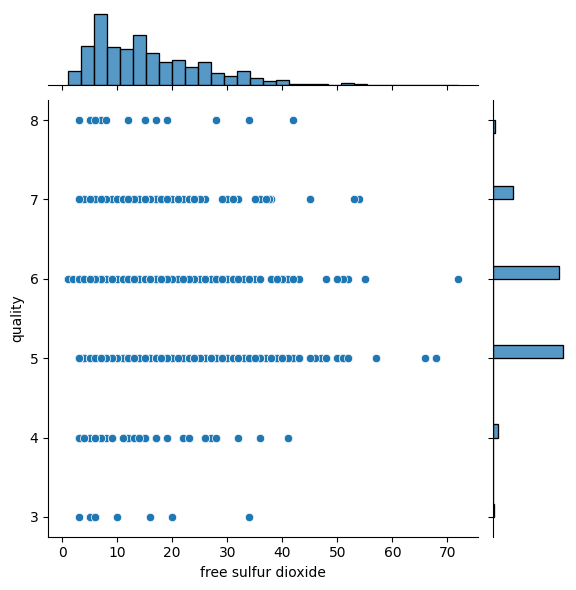

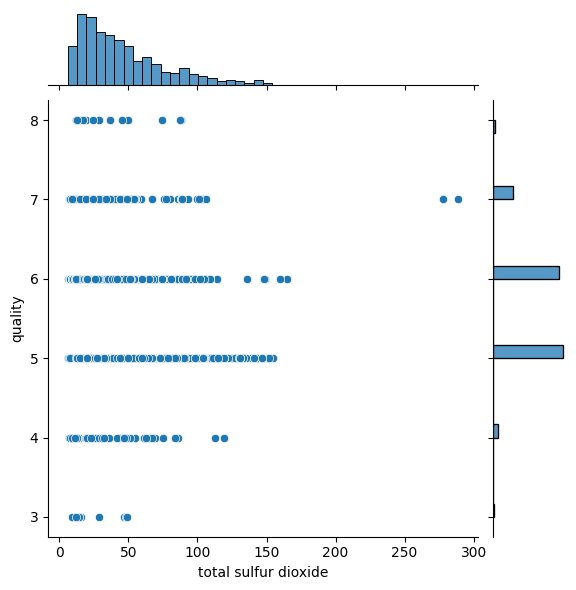

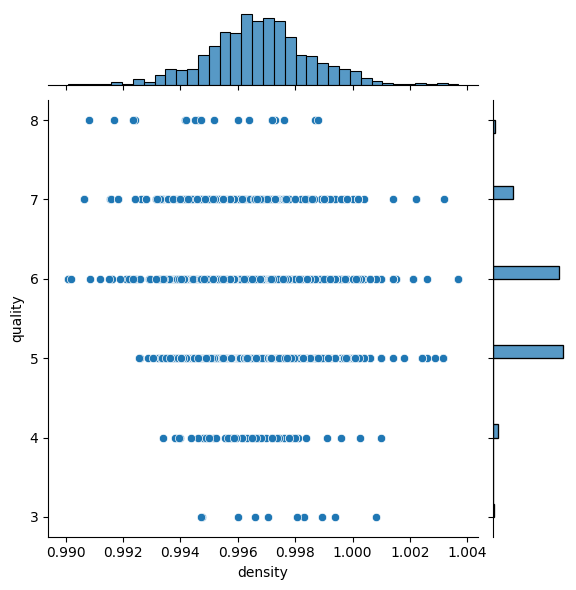

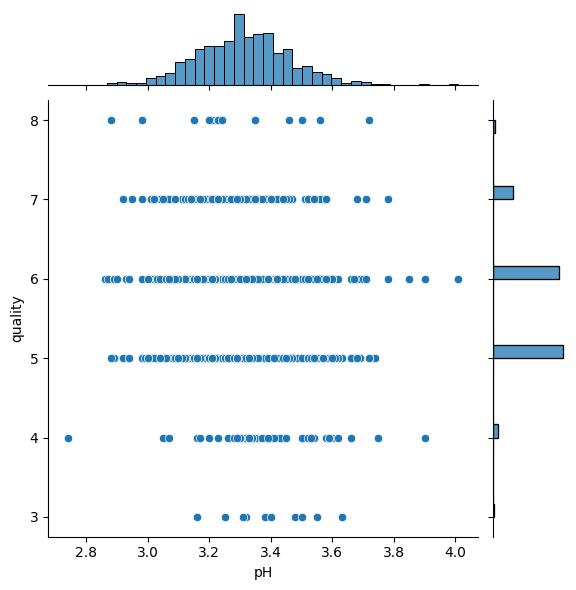

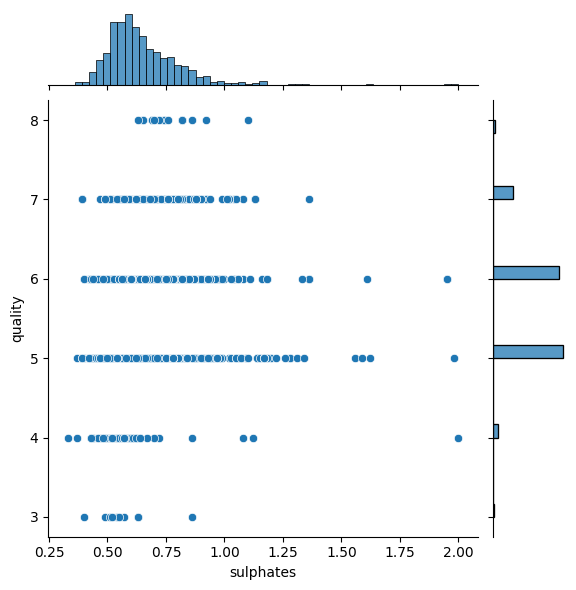

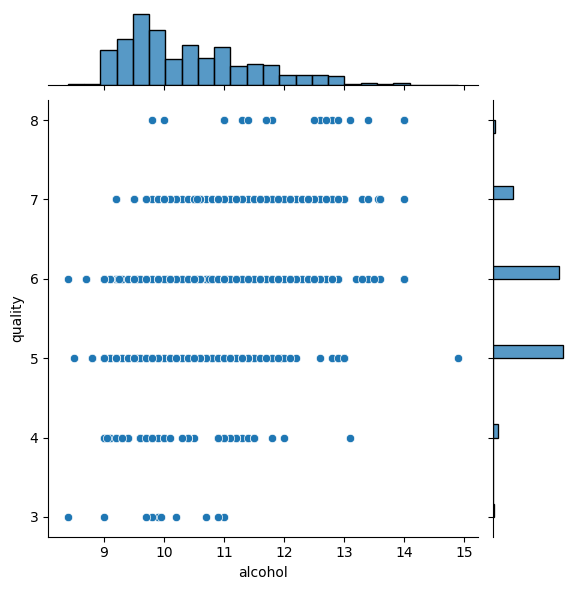

In [29]:
for col in df.drop(columns=["quality", "bom_ou_ruim"]):
    
    sns.jointplot(data=df, x=col, y="quality")
    plt.show()

_______

6) Utilizando a base de vinhos tintos, discretize a variável resposta `quality` em dois níveis categóricos para transformar o problema em um problema de classificação binária. Como valor de corte, utilize aquele que seja tal que os dois níveis categóricos estejam o mais igualmente distribuídos possível (isto é, um corte que minimize o desbalanceamento das classes). Sugestão: teste todos os valores de corte possíveis (não são muitos!)

Após a determinação do valor de corte que satisfaça às condições acima, responda: o que, qualitativamente, cada uma das duas classes representa? Esta discretização faz sentido? Se sim, para facilitar análises posteriores, nomeie as classes de acordo.

Dica: vamos usar esta nova variável resposta binária nas análises dos próximos exercícios, então sugiro que o dataframe com esta variável seja salvo num arquivo, para que ele possa ser simplesmente lido posteriormente.

In [30]:
df["quality"].sort_values().unique()

array([3, 4, 5, 6, 7, 8])


Distribuição das classes com corte = 3



quality
bom     1589
ruim      10
Name: count, dtype: int64

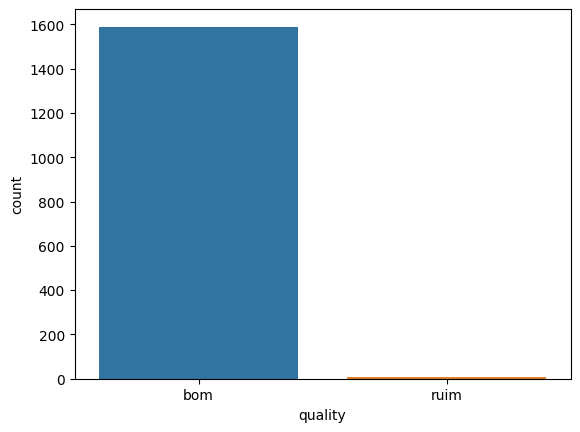


Distribuição das classes com corte = 4



quality
bom     1536
ruim      63
Name: count, dtype: int64

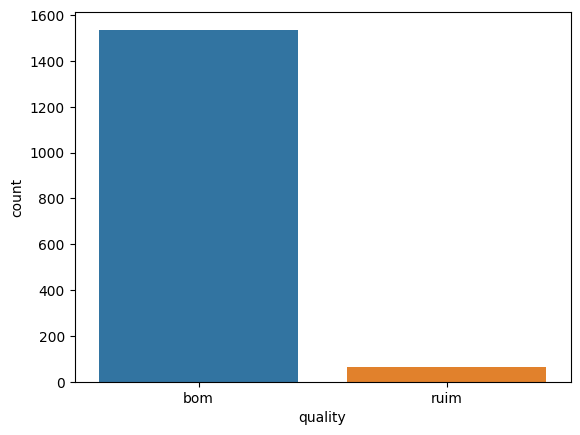


Distribuição das classes com corte = 5



quality
bom     855
ruim    744
Name: count, dtype: int64

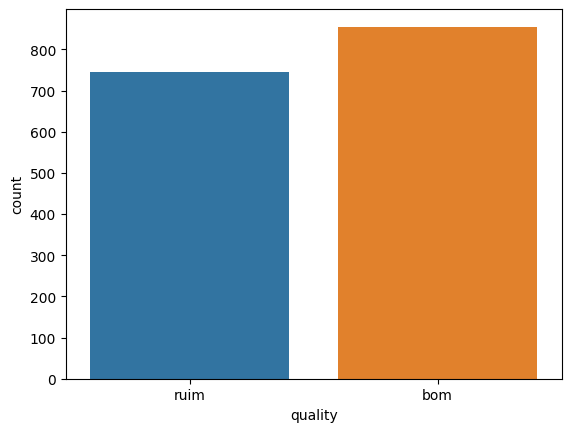


Distribuição das classes com corte = 6



quality
ruim    1382
bom      217
Name: count, dtype: int64

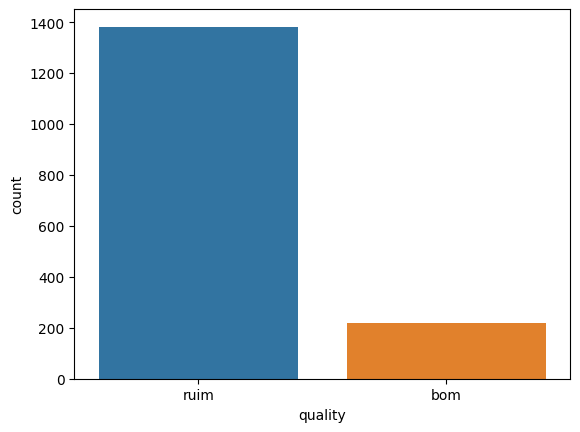


Distribuição das classes com corte = 7



quality
ruim    1581
bom       18
Name: count, dtype: int64

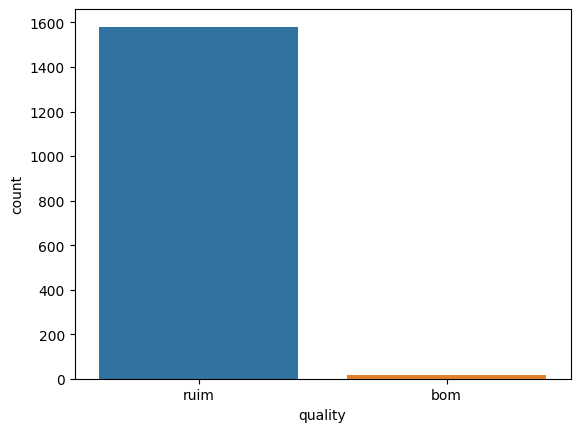


Distribuição das classes com corte = 8



quality
ruim    1599
Name: count, dtype: int64

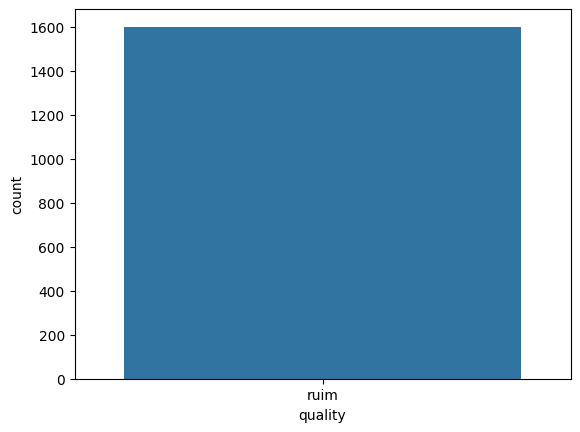

In [31]:
for corte in df["quality"].sort_values().unique():

    binarizacao = df["quality"].apply(lambda x: "bom" if x > corte else "ruim")

    print(f"\nDistribuição das classes com corte = {corte}\n")
    display(binarizacao.value_counts())
    
    sns.countplot(x=binarizacao)
    plt.show()

Um corte que dá o maior balanço é em 5, em cujo caso podemos tomar as duas classes como "ruim" ou "bom":

In [32]:
corte = 5

df["bom_ou_ruim"] = df["quality"].apply(lambda x: "bom" if x > corte else "ruim") 

In [33]:
df = df.drop(columns="quality")

In [34]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol bom_ou_ruim  
0         9.4        ruim  
1         9.8        ruim  
2         9.8        ruim  
3         9.8         bom  
4         9.4        ruim  
...       ...         ...  
1594     10.5        ruim  
1595     11.2         bom  
1596     11.0         bom  
1597     10.2        ruim  
1598     11.0         bom  

[1599 rows x 12 columns]

In [35]:
df.to_csv("winequality-red_binary_target.csv")

_______

7) Considere a base de vinhos tintos com a variável `quality` discretizada em duas classes ("bom" para nota maior que 5; "ruim" caso contrário). Vamos agora analisar a separabilidade das duas classes do problema. Para isso, faça:

- Visualize as distribuições das features, com indicação dos diferentes níveis categóricos do target;
- Visualize as projeções dos dados em cada um dos subespaços de pares de features, com indicação dos níveis categóricos do target;

Responda: com base nesta análise, o problema é linearmente separável?

In [36]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

In [37]:
df.groupby("bom_ou_ruim").mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
bom_ou_ruim                                                                 
bom               8.474035          0.474146     0.299883        2.535965   
ruim              8.142204          0.589503     0.237755        2.542070   

             chlorides  free sulfur dioxide  total sulfur dioxide   density  \
bom_ou_ruim                                                                   
bom           0.082661            15.272515             39.352047  0.996467   
ruim          0.092989            16.567204             54.645161  0.997068   

                   pH  sulphates    alcohol  
bom_ou_ruim                                  
bom          3.310643   0.692620  10.855029  
ruim         3.311653   0.618535   9.926478

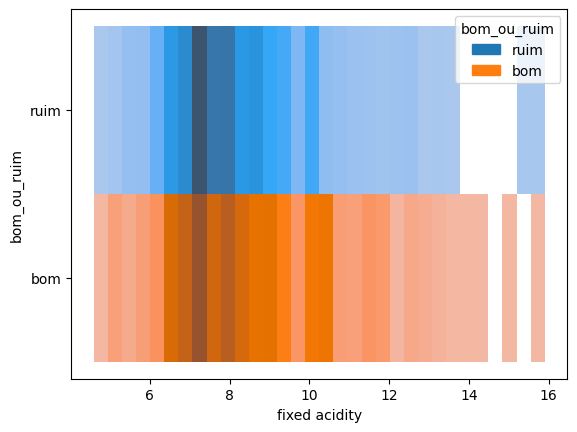

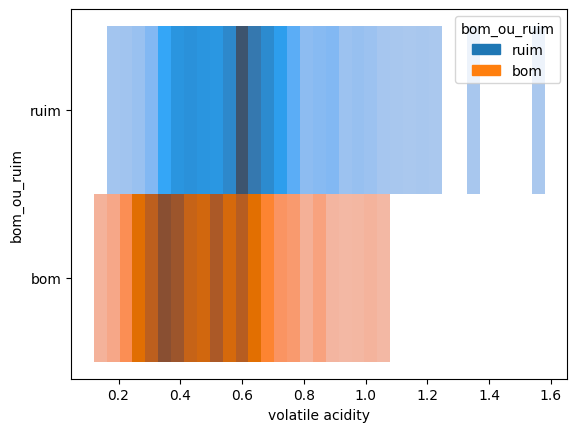

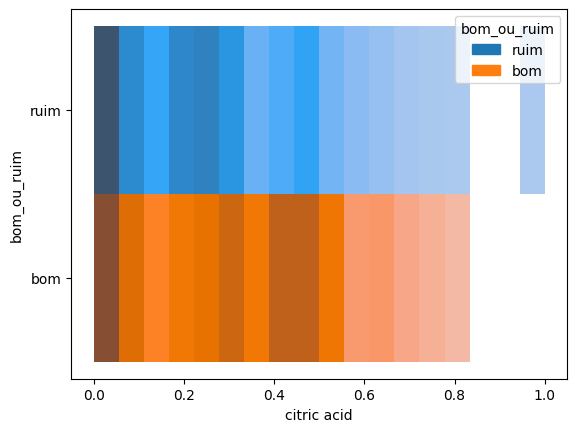

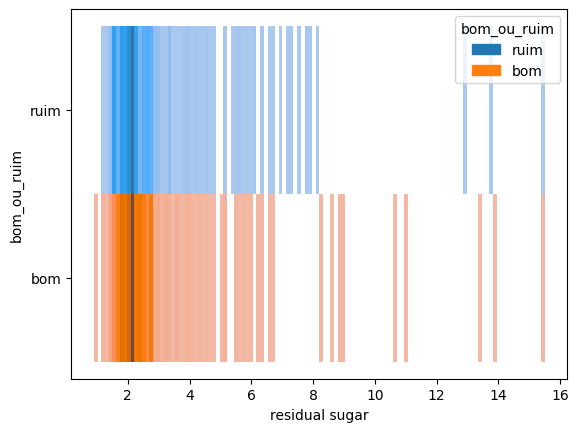

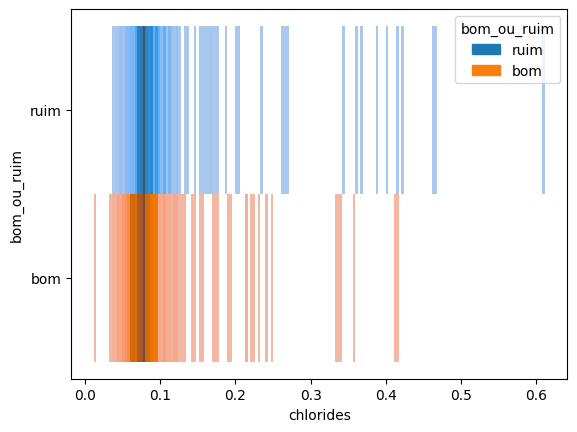

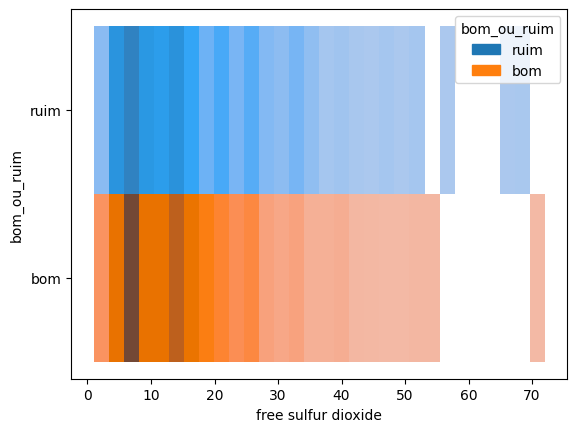

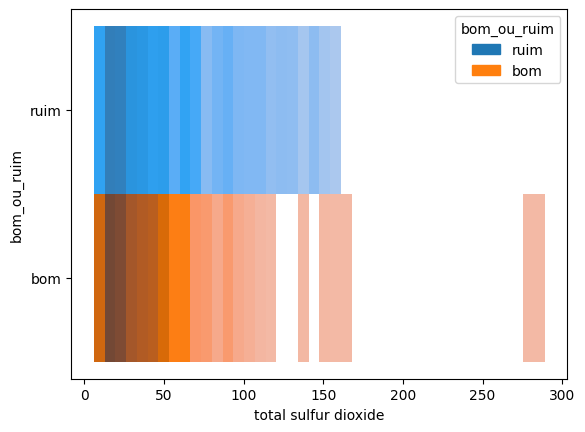

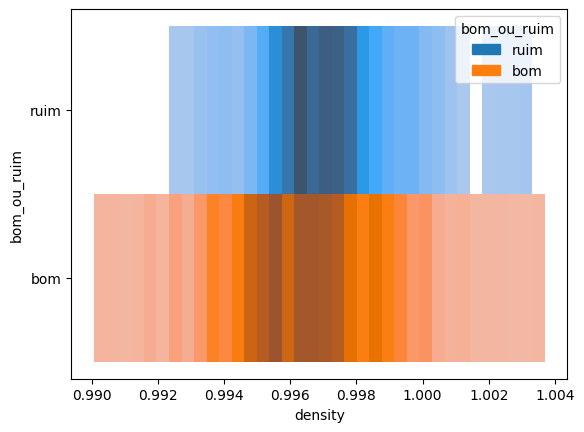

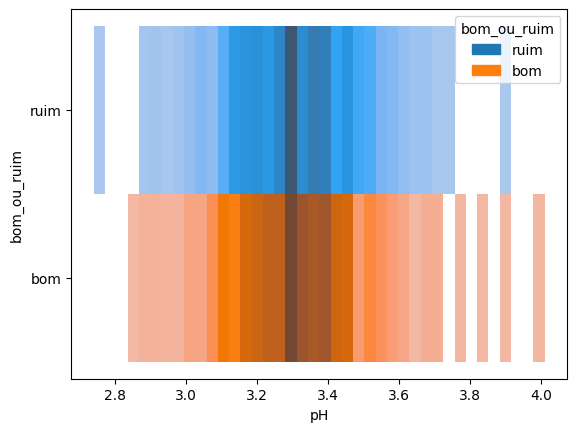

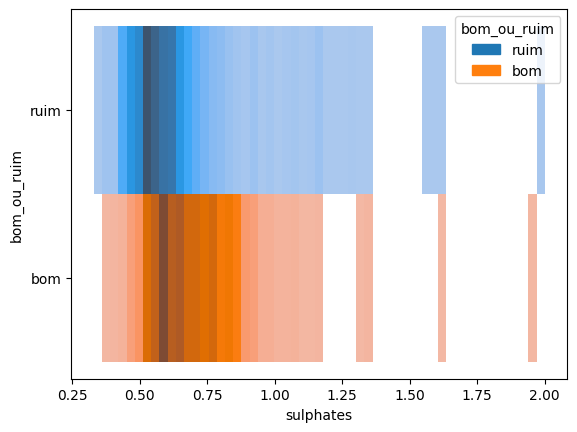

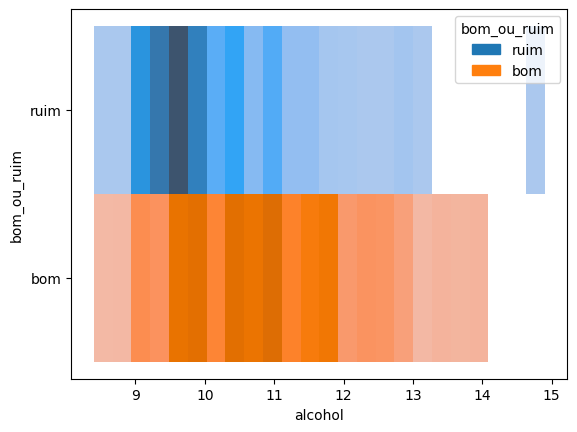

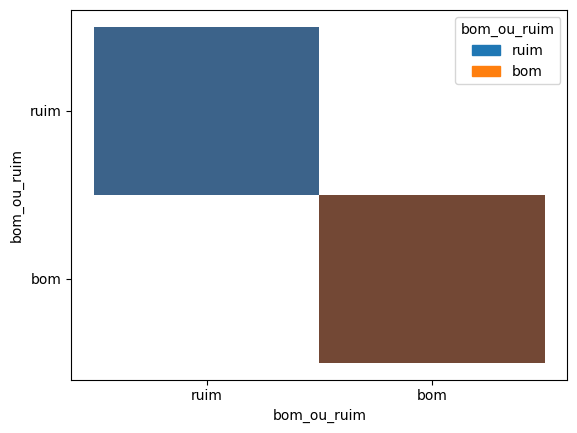

In [38]:
for col in df.columns:
    sns.histplot(data=df, x=col, y="bom_ou_ruim", hue="bom_ou_ruim", kde=True)
    plt.show()

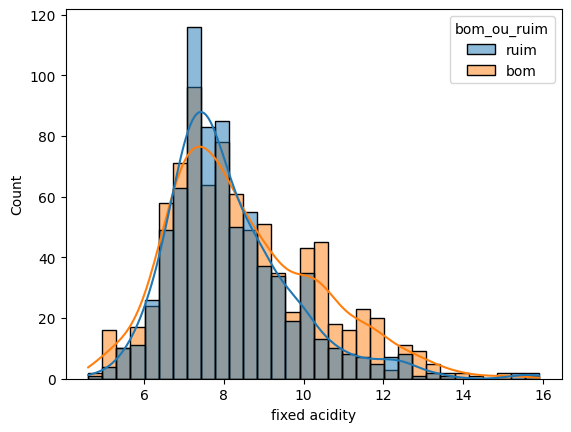

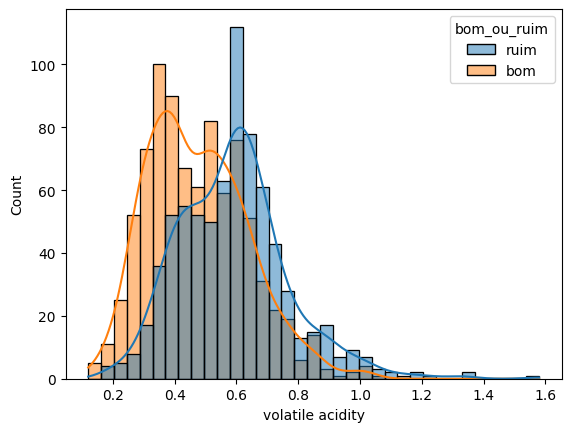

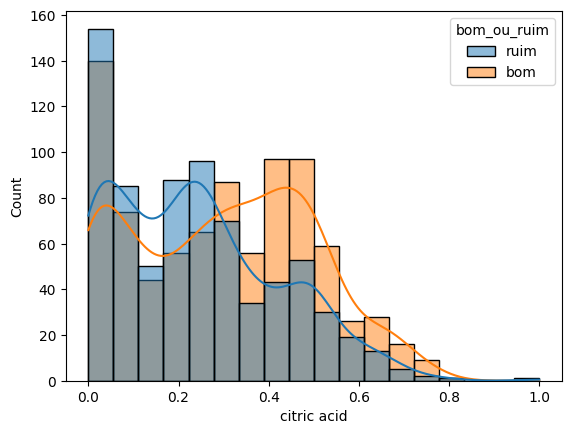

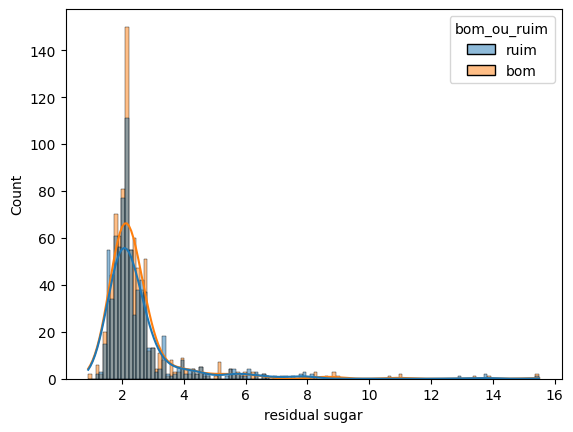

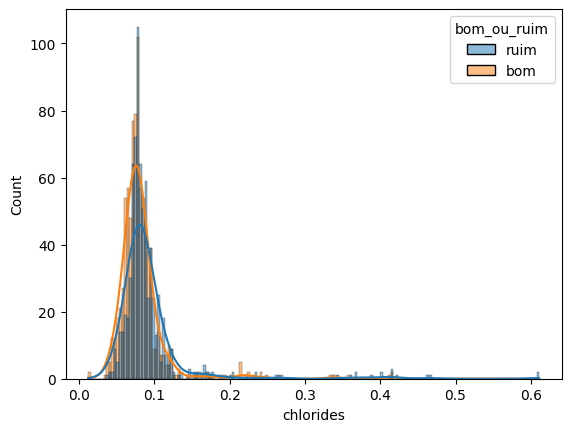

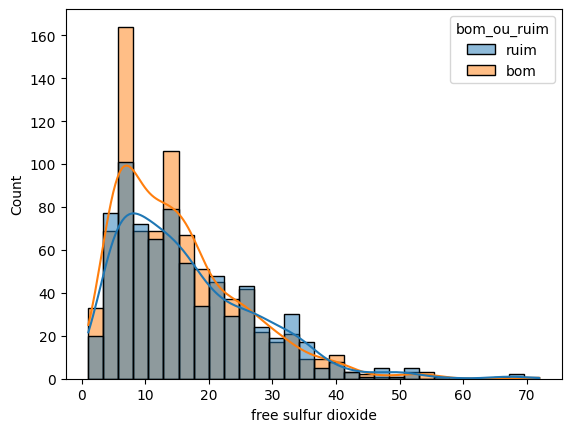

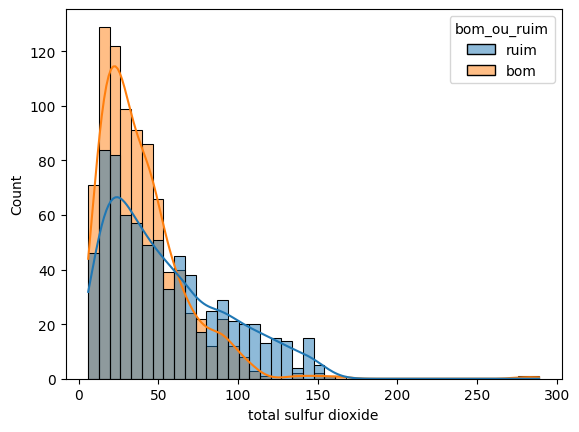

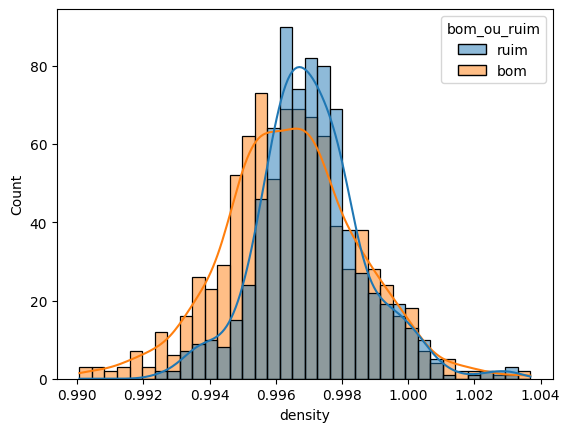

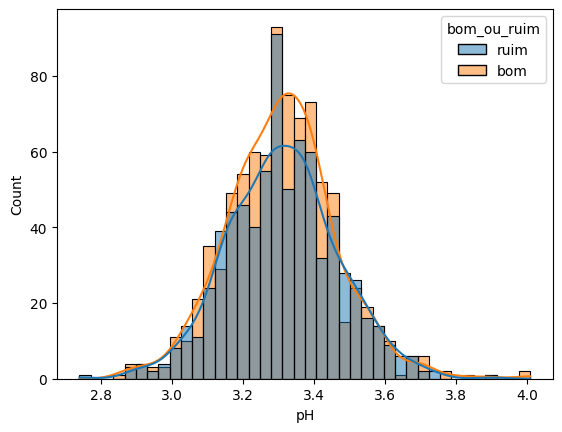

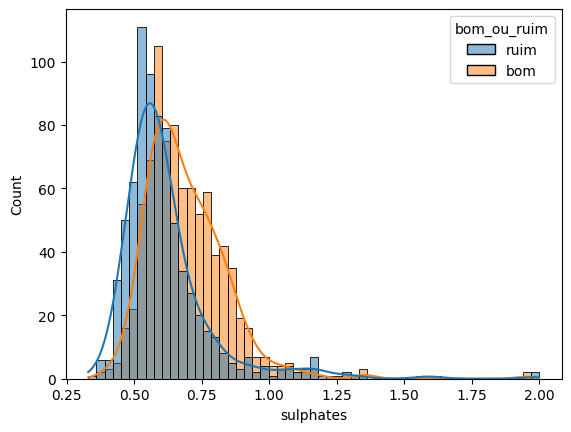

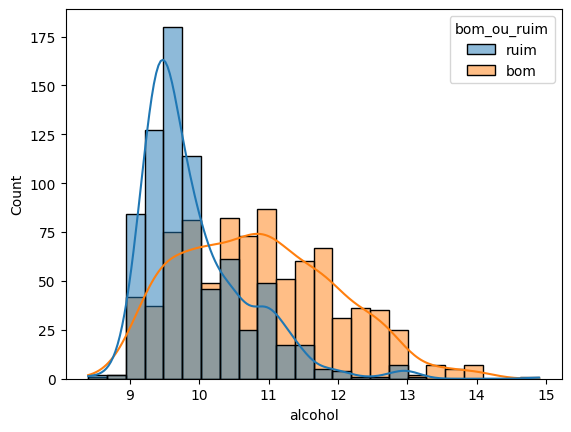

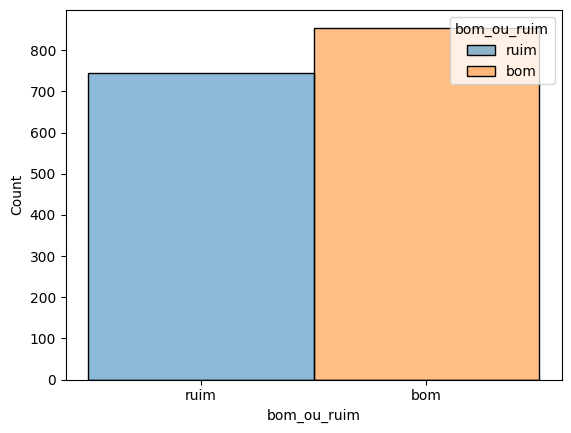

In [39]:
for col in df.columns:
    sns.histplot(data=df, x=col, hue="bom_ou_ruim", kde=True)
    plt.show()

In [40]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

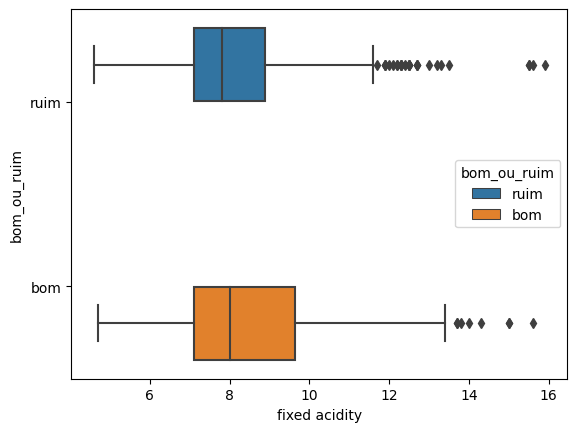

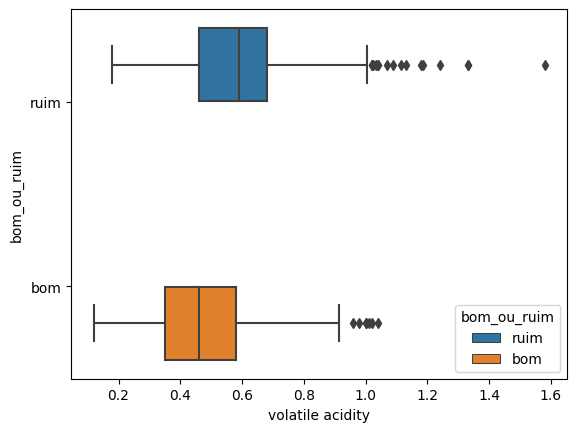

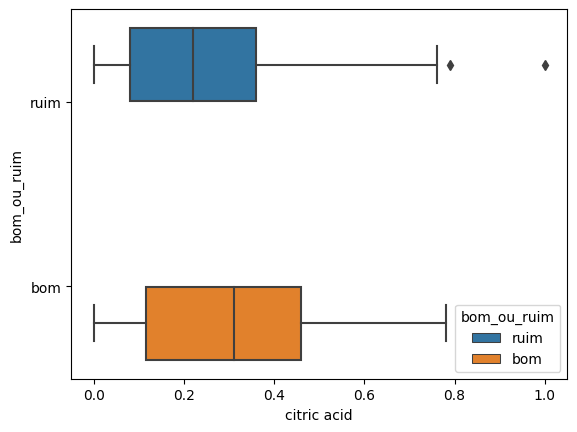

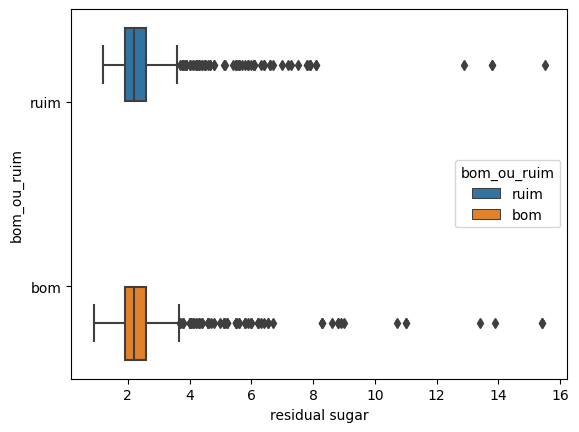

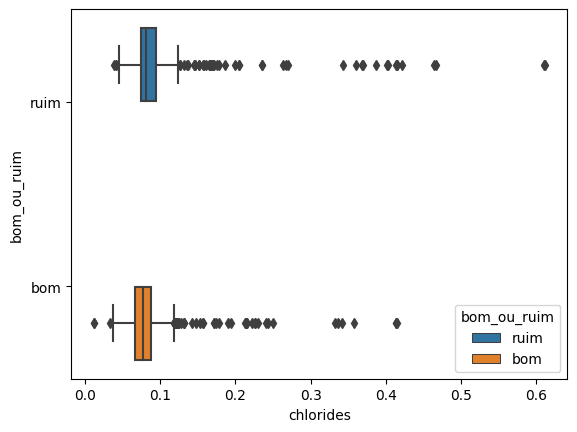

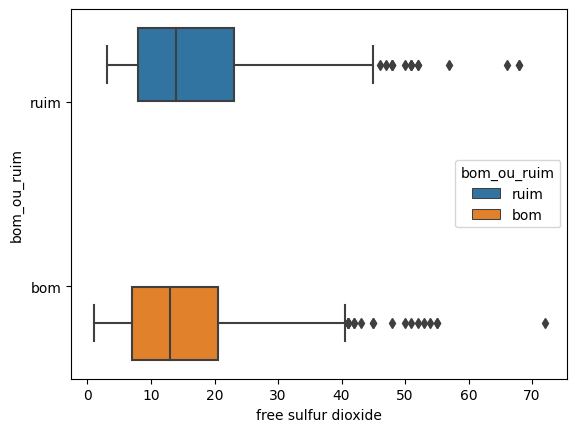

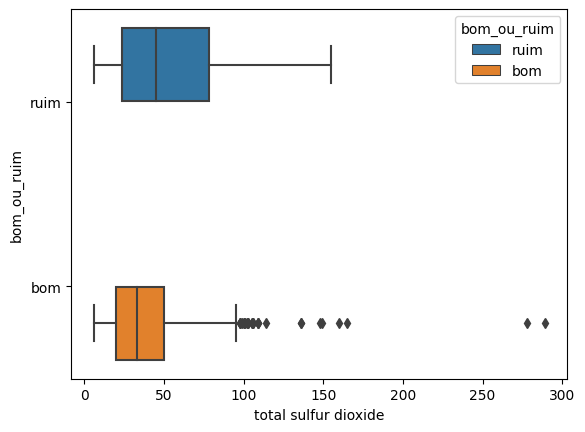

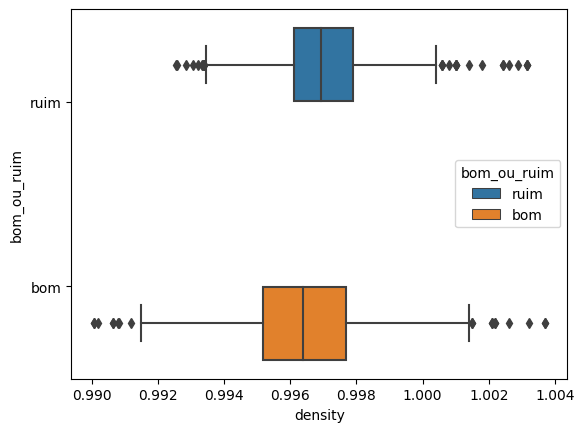

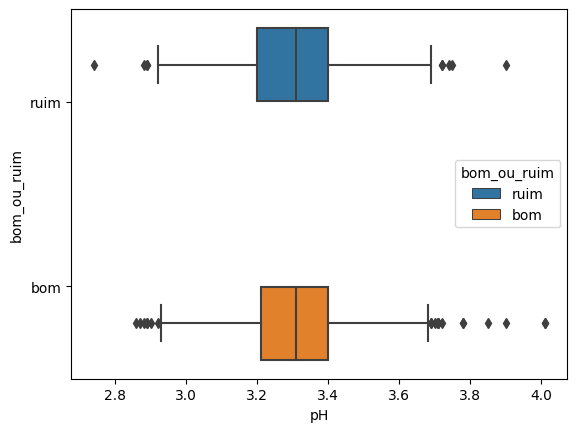

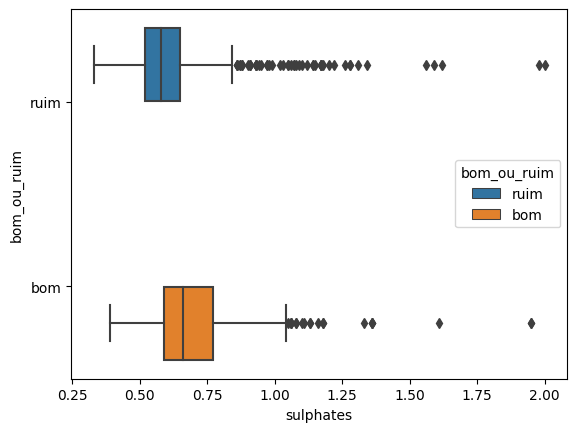

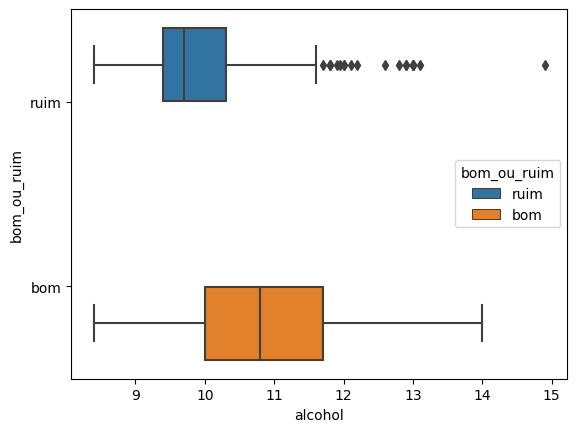

In [41]:
for col in df.columns[:-1]:
    sns.boxplot(data=df, x=col, y="bom_ou_ruim", hue="bom_ou_ruim")
    plt.show()

In [42]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol bom_ou_ruim  
0         9.4        ruim  
1         9.8        ruim  
2         9.8        ruim  
3         9.8         bom  
4         9.4        ruim  
...       ...         ...  
1594     10.5        ruim  
1595     11.2         bom  
1596     11.0         bom  
1597     10.2        ruim  
1598     11.0         bom  

[1599 rows x 12 columns]

/home/zero/base_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


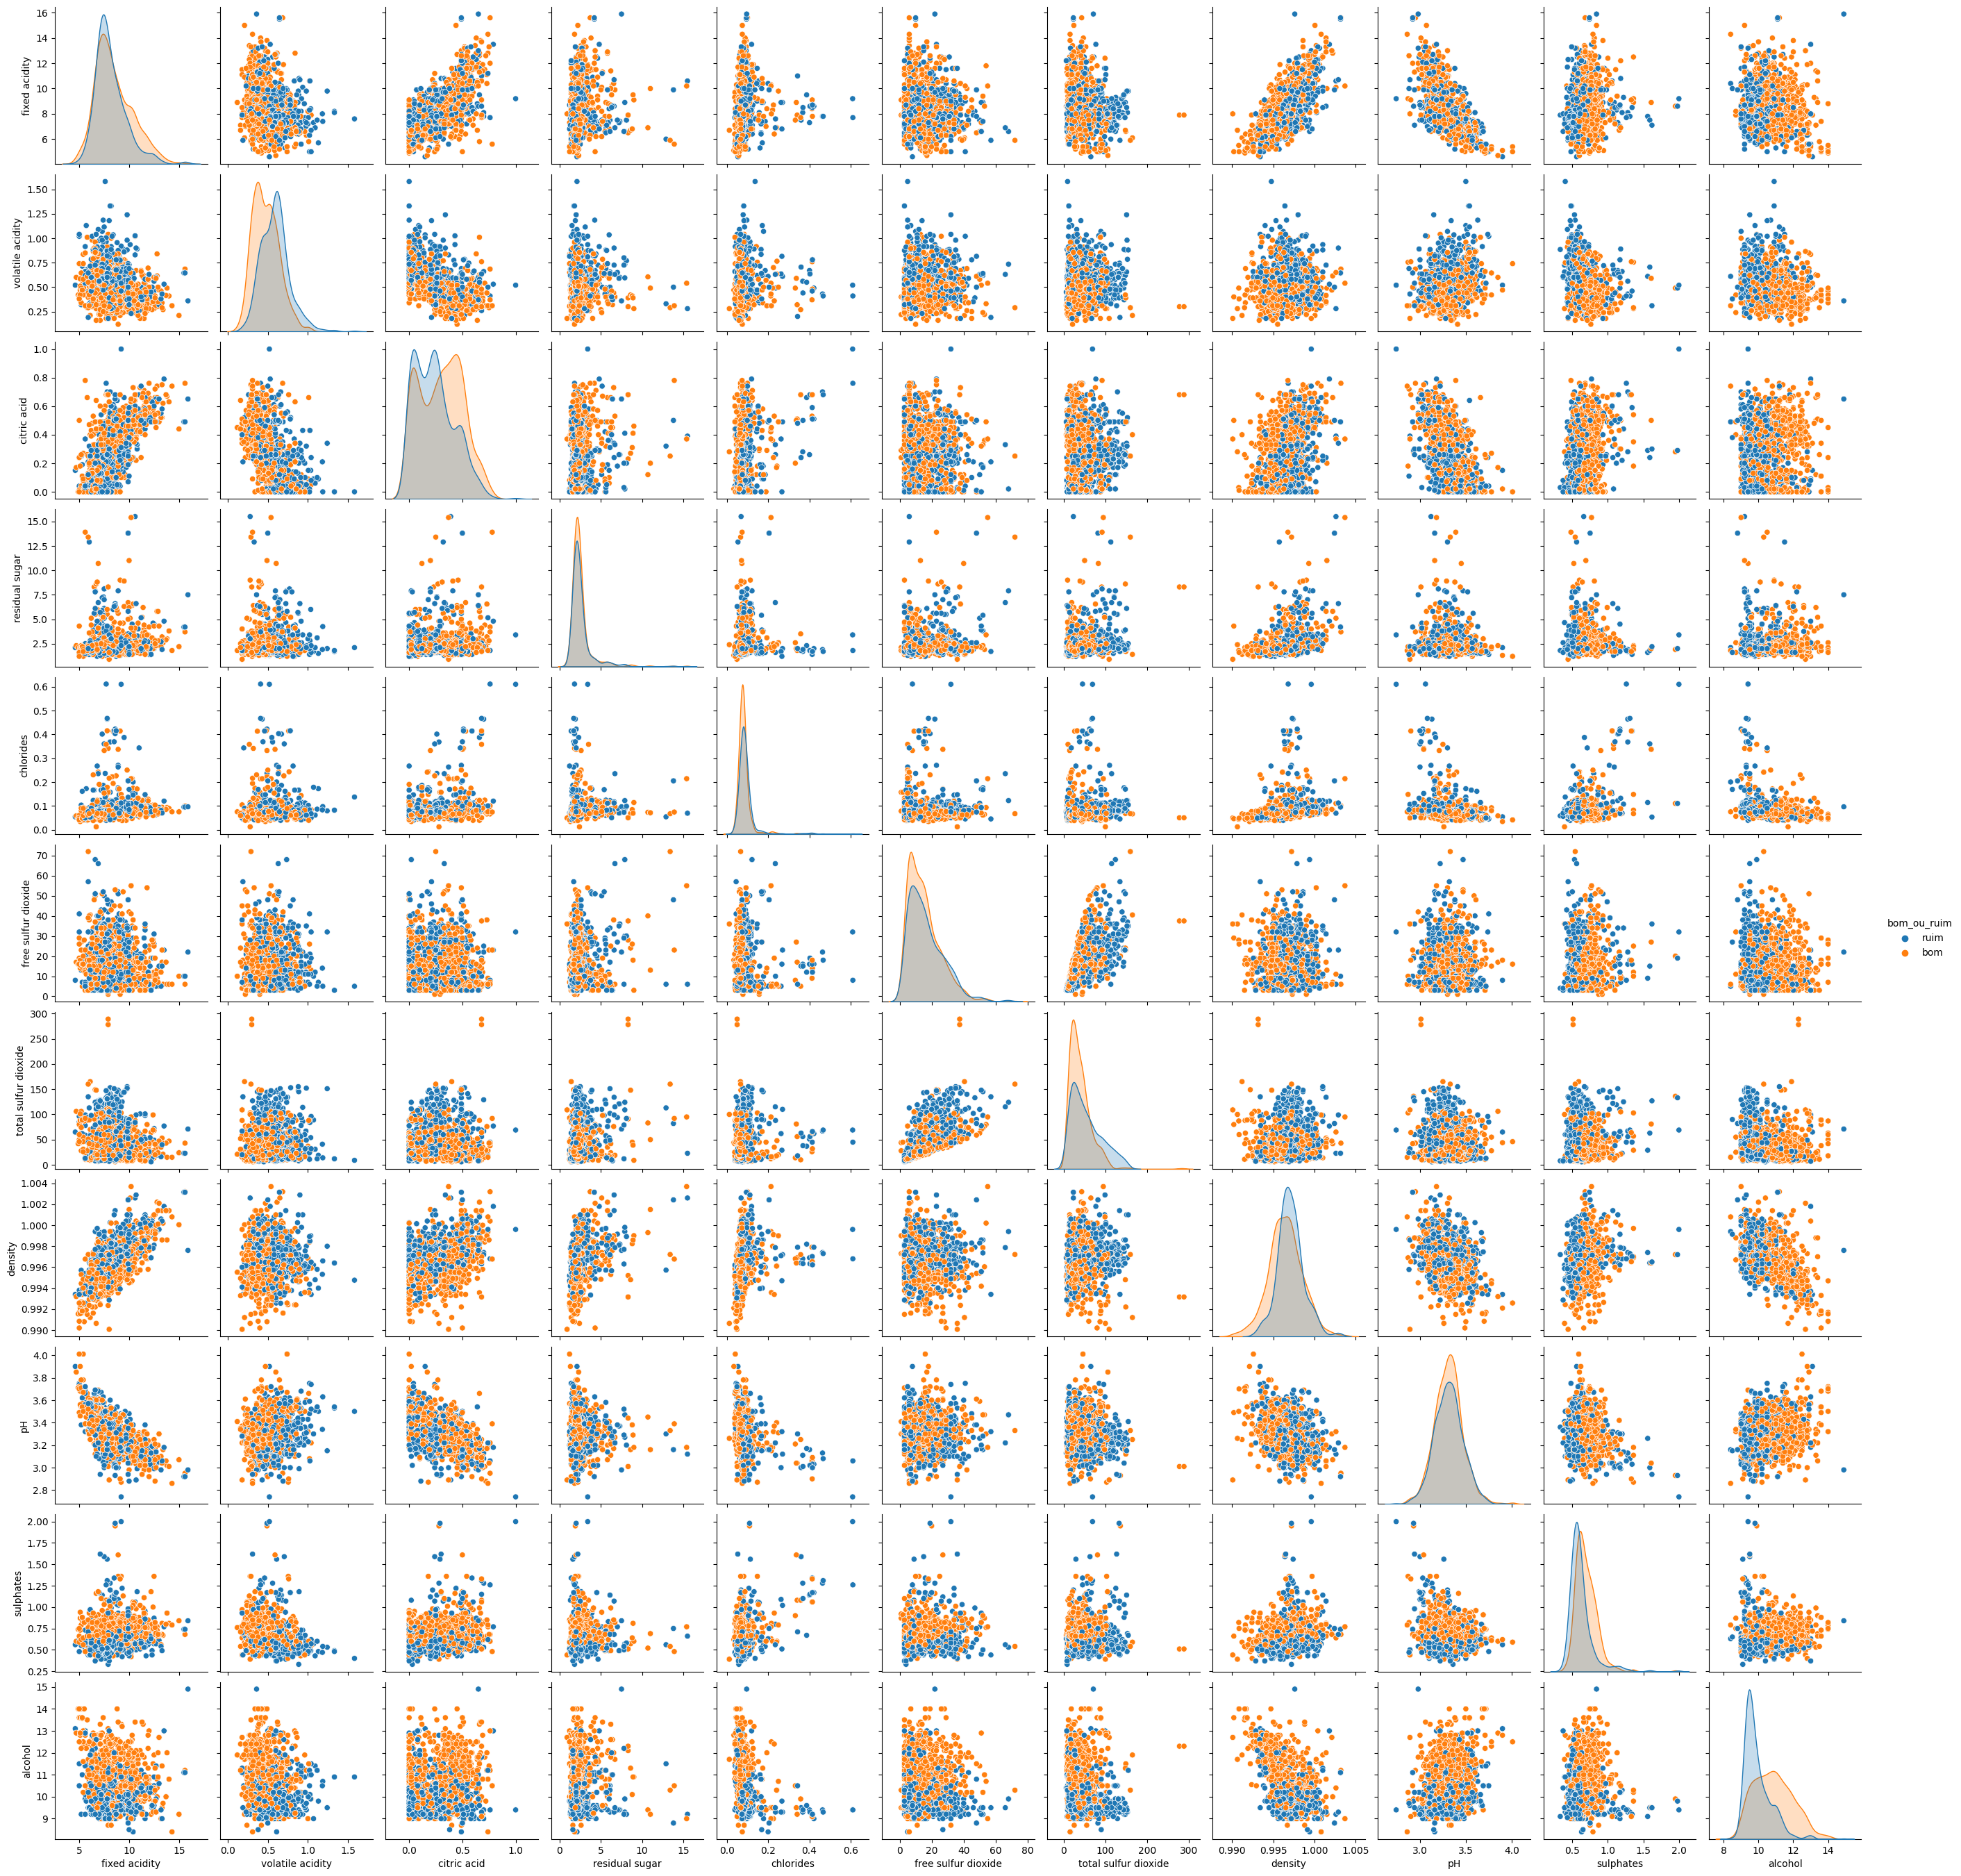

In [43]:
sns.pairplot(df, hue="bom_ou_ruim")

_______

8) Considere a base de vinhos tintos com a variável `quality` discretizada em duas classes. Faça:

- Agrupe os dados pelos níveis categóricos do target, e calcule a média de cada uma das features;

- Faça um teste de hipótese para determinar se, a um nível de significância de 5%, há diferença na média de cada uma das sub-amostras de cada classe, para todas as variáveis;

- Compare a distribuição das features analisando o boxplot de cada uma, separados pelas duas classes do target.

Dica: utilize as ferramentas do scipy e do scikit-learn.

In [44]:
df.groupby("bom_ou_ruim").mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
bom_ou_ruim                                                                 
bom               8.474035          0.474146     0.299883        2.535965   
ruim              8.142204          0.589503     0.237755        2.542070   

             chlorides  free sulfur dioxide  total sulfur dioxide   density  \
bom_ou_ruim                                                                   
bom           0.082661            15.272515             39.352047  0.996467   
ruim          0.092989            16.567204             54.645161  0.997068   

                   pH  sulphates    alcohol  
bom_ou_ruim                                  
bom          3.310643   0.692620  10.855029  
ruim         3.311653   0.618535   9.926478

In [45]:
df.groupby("bom_ou_ruim").var()

fixed acidity  volatile acidity  citric acid  residual sugar  \
bom_ou_ruim                                                                 
bom               3.470004          0.026244     0.039955        2.030154   
ruim              2.472429          0.031668     0.033624        1.941983   

             chlorides  free sulfur dioxide  total sulfur dioxide   density  \
bom_ou_ruim                                                                   
bom           0.001388           100.772253            742.741258  0.000004   
ruim          0.003112           118.598438           1348.392763  0.000003   

                   pH  sulphates   alcohol  
bom_ou_ruim                                 
bom          0.023887   0.024198  1.223478  
ruim         0.023807   0.031044  0.574574

Pro teste de hipótese, vamos usar a função [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind) do scipy.stats!

Faremos um teste t de Welch (não assumiremos variância populacional igual).

O teste que faremos será:

> $H_0: \ \mu_1 = \mu_2$

> $H_1: \ \mu_1 \neq \mu_2$

Que pode ser reescrito como:

> $H_0: \ \mu_1 - \mu_2 = 0$

> $H_1: \ \mu_1 - \mu_2 \neq 0$

________

Entendendo o que é feito no bloco de código abaixo:

In [46]:
pop_vinhos_bons = df.query("bom_ou_ruim == 'bom'")
pop_vinhos_ruins = df.query("bom_ou_ruim == 'ruim'")

In [47]:
import scipy

col = "pH"

t, p = scipy.stats.ttest_ind(
    pop_vinhos_bons[col], 
    pop_vinhos_ruins[col],
    alternative='two-sided',
    equal_var=False,
)

sig = 0.05

print(f"\nPara a coluna {col} (t={t:.2f}, p={p:.2f}), a um nível de signficância {sig}, temos a conclusão:\n")

if p > sig:
    print("Falha em rejeitar H0: não existe evidência para dizer que as médias são diferentes! Ou seja, não parece haver separabilidade com relação às médias!")
else:
    print("Rejeitamos H0: há evidência de que as médias são diferentes! Ou seja, há indício de separabilidade com relação às médias!")
    
print(f"\n{'='*80}\n")


Para a coluna pH (t=-0.13, p=0.90), a um nível de signficância 0.05, temos a conclusão:

Falha em rejeitar H0: não existe evidência para dizer que as médias são diferentes! Ou seja, não parece haver separabilidade com relação às médias!




_______

Vamos agora aplicar o procedimento acima a todas as features:

In [48]:
for col in df.columns[:-1]:

    t, p = scipy.stats.ttest_ind(
        pop_vinhos_bons[col], 
        pop_vinhos_ruins[col],
        alternative='two-sided',
        equal_var=False,
    )

    sig = 0.05

    print(f"\nPara a coluna {col} (t={t:.2f}, p={p:.5f}), a um nível de signficância {sig}, temos a conclusão:\n")

    if p > sig:
        print("Falha em rejeitar H0: não existe evidência para dizer que as médias são diferentes! Ou seja, não parece haver separabilidade com relação às médias!")
    else:
        print("Rejeitamos H0: há evidência de que as médias são diferentes! Ou seja, há indício de separabilidade com relação às médias!")

    print(f"\n{'='*80}\n")


Para a coluna fixed acidity (t=3.86, p=0.00012), a um nível de signficância 0.05, temos a conclusão:

Rejeitamos H0: há evidência de que as médias são diferentes! Ou seja, há indício de separabilidade com relação às médias!



Para a coluna volatile acidity (t=-13.48, p=0.00000), a um nível de signficância 0.05, temos a conclusão:

Rejeitamos H0: há evidência de que as médias são diferentes! Ou seja, há indício de separabilidade com relação às médias!



Para a coluna citric acid (t=6.48, p=0.00000), a um nível de signficância 0.05, temos a conclusão:

Rejeitamos H0: há evidência de que as médias são diferentes! Ou seja, há indício de separabilidade com relação às médias!



Para a coluna residual sugar (t=-0.09, p=0.93110), a um nível de signficância 0.05, temos a conclusão:

Falha em rejeitar H0: não existe evidência para dizer que as médias são diferentes! Ou seja, não parece haver separabilidade com relação às médias!



Para a coluna chlorides (t=-4.29, p=0.00002), a um nível de 

Conclusão: temos um problema de classificação cujas classes não são trivialmente separadas!

No entanto, existe sim alguma separabilidade: então há esperança de que conseguiremos construir algum modelo minimamente performático!

Em reunião com negócio, alinhamos dois pontos:

- 1°: expectativas quanto à performance do modelo, dada a dificuldade do problema;

- 2°: deixamos aberta a porta e criamos a "curiosidade" por parte do negócio de saber sobre a performance do modelo.

Expectativas alinhadas!

___________

Uma vez que você tenha respondido às questões anteriores, você completou o importantíssimo (e longo!) processo de análise exploratória dos dados (EDA, do termo inglês, *exploratory data analysis*)!

De fato, a etapa de EDA é importantíssima em todo projeto de ciência de dados, pois é apenas explorando os dados que de fato nos familiarizamos com o contexto do problema com o qual estamos trabalhando, o que é fundamental para o sucesso das próximas etapas, que pode envolver a criação e avaliação de modelos de machine learning.

Agora podemos começar a pensar na construção de um modelo -- mas isso fica para um segundo momento!

__________
__________
__________


### Observação importante!

A primeira EDA pode ser feita com toda a amostra de dados que temos disponível, sem problemas.

No entanto, a partir do momento em que chegamos à conclusão de que de fato é necessário construir um modelo, é importante que façamos o **train-test split**, e:

>**Qualquer análise exploratória que, de qualquer maneira, guie o processo de construção do modelo, deve ser feita unicamente com os dados de treino!**

Isso é importante porque, lembre-se, a base de teste tem o único propósito de nos auxiliar a estimar a performance de generalização de nosso modelo, e não deve ser usada em hipótese alguma no passo 1 do ciclo de modelagem (construção do modelo), pois se isso acontecer, estaremos cometendo data leakage, e a estimativa de generalização pode se invalidar!